In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)


In [3]:
# random data for three classes
class1 = np.random.normal(loc=[2, 2], scale=0.5, size=(100, 2))
class2 = np.random.normal(loc=[6, 6], scale=0.5, size=(100, 2))
class3 = np.random.normal(loc=[4, 8], scale=0.5, size=(100, 2))


In [4]:
X = np.vstack((class1, class2, class3))
Y = np.array([0] * 100 + [1] * 100 + [2] * 100).reshape(-1, 1)  # Labels

In [5]:

Y_one_hot = np.zeros((Y.size, 3))
Y_one_hot[np.arange(Y.size), Y.flatten()] = 1

In [6]:
# Prepare Data
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y_one_hot, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


In [7]:
# Neural Network
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.learning_rate = 0.01
        self.W_HI = np.random.randn(input_dim, hidden_dim) * 0.1
        self.W_OH = np.random.randn(hidden_dim, output_dim) * 0.1

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.W_OH)
        self.pred = self.sigmoid(self.output_input)
        return self.pred

    def backPropagation(self, X, Y):
        output_error = Y - self.pred
        output_delta = self.learning_rate * output_error * self.sigmoid(self.pred, der=True)

        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)

        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)

    def train_with_validation(self, X_train, Y_train, X_val, Y_val, epochs=1000):
        train_errors = []
        val_errors = []
        for epoch in range(epochs):
            # Train  training set
            self.feedForward(X_train)
            self.backPropagation(X_train, Y_train)
            train_loss = np.mean(np.square(Y_train - self.pred))
            train_errors.append(train_loss)

            # validation loss
            val_pred = self.feedForward(X_val)
            val_loss = np.mean(np.square(Y_val - val_pred))
            val_errors.append(val_loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}")

        return train_errors, val_errors

    def evaluate_accuracy(self, X, Y):
        predictions = self.feedForward(X)
        accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(Y, axis=1))
        return accuracy

    def train_with_accuracy(self, X_train, Y_train, X_val, Y_val, epochs=1000):
        train_accuracies = []
        val_accuracies = []
        for epoch in range(epochs):
            # Train training set
            self.feedForward(X_train)
            self.backPropagation(X_train, Y_train)
            train_accuracy = self.evaluate_accuracy(X_train, Y_train)
            train_accuracies.append(train_accuracy)

            # Validate validation set
            val_pred = self.feedForward(X_val)
            val_accuracy = self.evaluate_accuracy(X_val, Y_val)
            val_accuracies.append(val_accuracy)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Train Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")

        return train_accuracies, val_accuracies


In [8]:
# Initialize the nn
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = Y_train.shape[1]

NN = NeuralNetwork(input_dim, hidden_dim, output_dim)

In [9]:
#Train the nn
epochs = 1000


In [10]:
# Track losses
train_losses, val_losses = NN.train_with_validation(X_train, Y_train, X_val, Y_val, epochs)


Epoch 0: Train Loss = 0.2438, Validation Loss = 0.2289
Epoch 100: Train Loss = 0.1494, Validation Loss = 0.1462
Epoch 200: Train Loss = 0.0875, Validation Loss = 0.0846
Epoch 300: Train Loss = 0.0484, Validation Loss = 0.0480
Epoch 400: Train Loss = 0.0309, Validation Loss = 0.0310
Epoch 500: Train Loss = 0.0226, Validation Loss = 0.0228
Epoch 600: Train Loss = 0.0179, Validation Loss = 0.0181
Epoch 700: Train Loss = 0.0149, Validation Loss = 0.0151
Epoch 800: Train Loss = 0.0129, Validation Loss = 0.0131
Epoch 900: Train Loss = 0.0114, Validation Loss = 0.0115


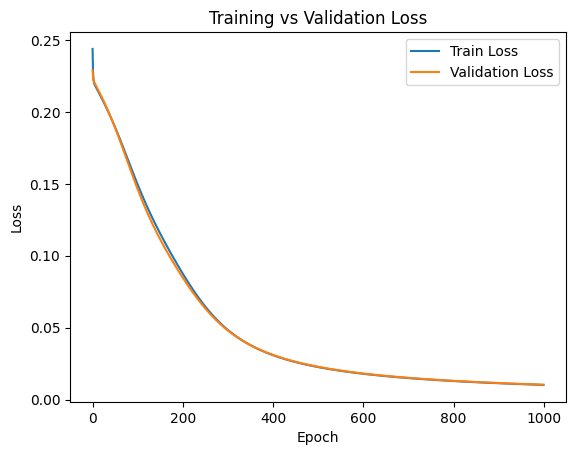

In [11]:
# Plot training vs validation loss
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [12]:
# Track accuracies
train_accuracies, val_accuracies = NN.train_with_accuracy(X_train, Y_train, X_val, Y_val, epochs)


Epoch 0: Train Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 100: Train Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 200: Train Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 300: Train Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 400: Train Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 500: Train Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 600: Train Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 700: Train Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 800: Train Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 900: Train Accuracy = 1.0000, Validation Accuracy = 1.0000


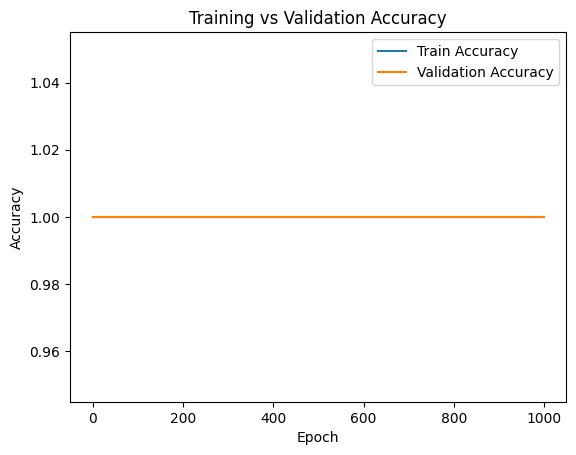

In [13]:
# Plot training vs validation accuracy
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [14]:
# Evaluate the Model
train_accuracy = NN.evaluate_accuracy(X_train, Y_train)
val_accuracy = NN.evaluate_accuracy(X_val, Y_val)
test_accuracy = NN.evaluate_accuracy(X_test, Y_test)

In [15]:
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 100.00%
Validation Accuracy: 100.00%
Test Accuracy: 100.00%


Train Accuracy: 100.00%
Validation Accuracy: 100.00%
Test Accuracy: 100.00%

I think its not overfitting because I check this in my code . also No signs of overfitting: The training and validation losses are following similar trends, and the gap between them remains small.
I happen some reason-
*dataset is small and classes are well-separated
*simple architecture with a reasonable number of parameters

Also I showed graph trainning vs validation loss and accrucy .I think can't do anything about all are 100% also it's positive, as it suggests that the model is not just memorizing the training data but is learning patterns that generalize well to the validation set .

In [16]:

print("Training Complete!")
print("I have successfully trained the model, and it appears to be performing well. That's 100% ")
print("Looking forward to your feedback.")


Training Complete!
I have successfully trained the model, and it appears to be performing well. That's 100% 
Looking forward to your feedback.
